In [1]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive
Dataset with 10000 car entries has been generated and saved to /content/drive/My Drive/KENYAN_CAR_DATASET.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/drive/MyDrive/KENYAN_CAR_DATASET.csv')
df.head(10)

,Model,Color,Year,Horsepower,Price (KSH),Mileage (KM)
0,Audi A4,Black,2009,494,3391595,110305
1,Mercedes-Benz C-Class,Red,2003,661,4304627,253540
2,Mercedes-Benz C-Class,Blue,2013,117,1006584,96733
3,Toyota Corolla,Black,2014,134,7776970,114382
4,Mazda 3,Yellow,2021,455,3338655,297305
5,Subaru Impreza,Blue,2006,243,1493634,43
6,Subaru Impreza,Silver,2020,444,9959591,81405
7,Subaru Impreza,Black,2007,180,8523739,133292
8,Mercedes-Benz C-Class,Orange,2013,593,8629020,4910
9,Mazda 3,White,2014,371,3943361,25620


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2.010968e+03,6.614127e+00,2000.0,2005.00,2011.0,2017.0,2022.0
Horsepower,10000.0,3.881100e+02,1.815212e+02,70.0,230.00,390.0,545.0,700.0
Price (KSH),10000.0,5.234389e+06,2.726761e+06,500112.0,2932055.25,5212574.0,7576158.5,9998612.0
Mileage (KM),10000.0,1.509654e+05,8.683689e+04,32.0,75792.50,152024.0,225490.0,299987.0


In [18]:
df1 = df.copy()

In [16]:
df.shape

(10000, 6)

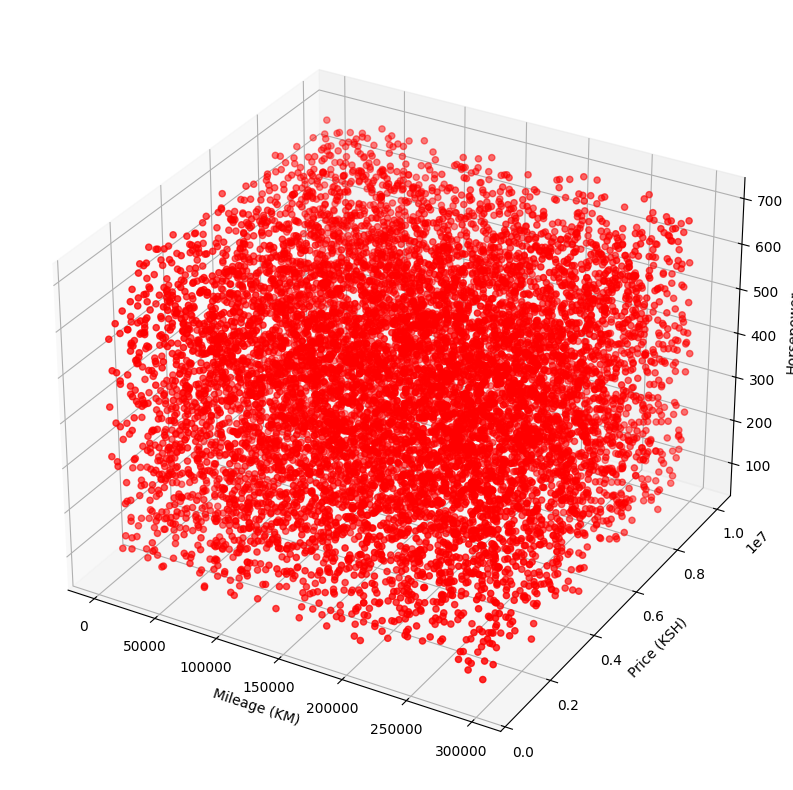

In [19]:
# Create 3D Axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Set the axis labels
ax.set_zlabel('Horsepower')
ax.set_ylabel('Price (KSH)')
ax.set_xlabel('Mileage (KM)')
ax.scatter(df1['Mileage (KM)'], df1['Price (KSH)'], df1['Horsepower'], c='r', marker='o')
plt.show()

In [21]:
# import regression module
from sklearn.linear_model import LinearRegression


In [22]:
X = df.drop(['Horsepower'], axis=1)
y = df['Horsepower']

In [24]:
lm = LinearRegression()

In [25]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [32]:
# Create and train the Linear Regression model
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
beta_0 = float(lm.intercept_)

In [34]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [35]:
print("Intercept:", beta_0)

Intercept: 138.74966814089197


In [36]:
beta_js

,Coefficient
Year,1.247128e-01
Price (KSH),1.898472e-07
Mileage (KM),-1.448916e-05
Model_Audi A4,5.068219e+00
Model_BMW 3 Series,-7.352300e-01
Model_Honda Civic,-2.034265e+00
Model_Mazda 3,-1.620695e+00
Model_Mercedes-Benz C-Class,5.641531e+00
Model_Nissan Altima,-7.616145e+00
Model_Subaru Impreza,1.402188e+00


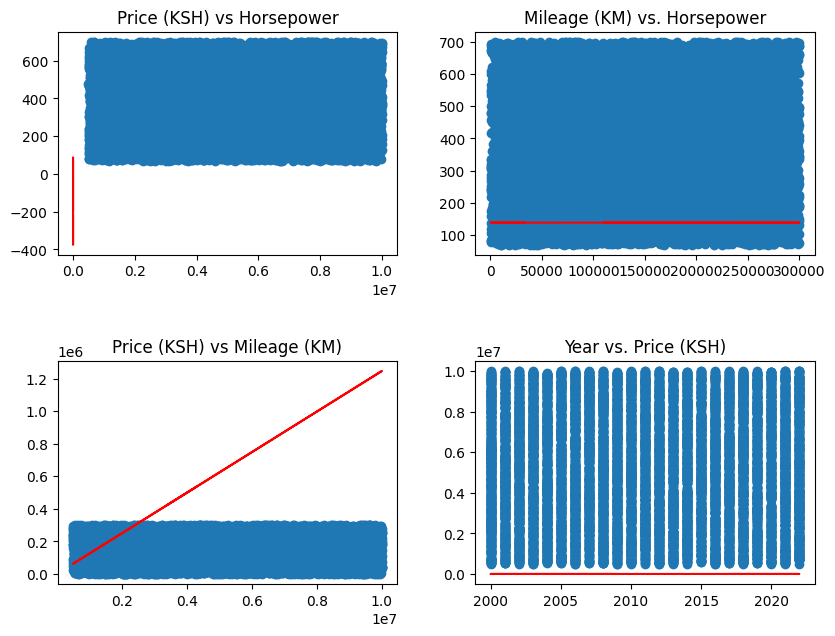

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['Price (KSH)'], df['Horsepower'])
axs[0,0].plot(df['Horsepower'], lm.intercept_ + lm.coef_[4]*df['Horsepower'], color='red')
axs[0,0].title.set_text('Price (KSH) vs Horsepower')

axs[0,1].scatter(df['Mileage (KM)'], df['Horsepower'])
axs[0,1].plot(df['Mileage (KM)'], lm.intercept_ + lm.coef_[1]*df['Mileage (KM)'], color='red')
axs[0,1].title.set_text('Mileage (KM) vs. Horsepower')

axs[1,0].scatter(df['Price (KSH)'], df['Mileage (KM)'])
axs[1,0].plot(df['Price (KSH)'], lm.intercept_ + lm.coef_[0]*df['Price (KSH)'], color='red')
axs[1,0].title.set_text('Price (KSH) vs Mileage (KM)')

axs[1,1].scatter(df['Year'], df['Price (KSH)'])
axs[1,1].plot(df['Year'], lm.intercept_ + lm.coef_[2]*df['Year'], color='red')
axs[1,1].title.set_text('Year vs. Price (KSH)')

fig.tight_layout(pad=3.0)

plt.show()

In [39]:
slr = LinearRegression()

slr.fit(X_train[['Mileage (KM)']], y_train)

LinearRegression()

Assessing model accuracy

In [40]:
from sklearn import metrics
import math

In [41]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Mileage (KM)']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Mileage (KM)']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Mileage (KM)']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [42]:
# create DataFrame from dictionary
results_df = pd.DataFrame(data=results_dict)

In [43]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,32820.882023,33447.768331,182.887310
MLR,32741.966735,33551.817186,183.171551


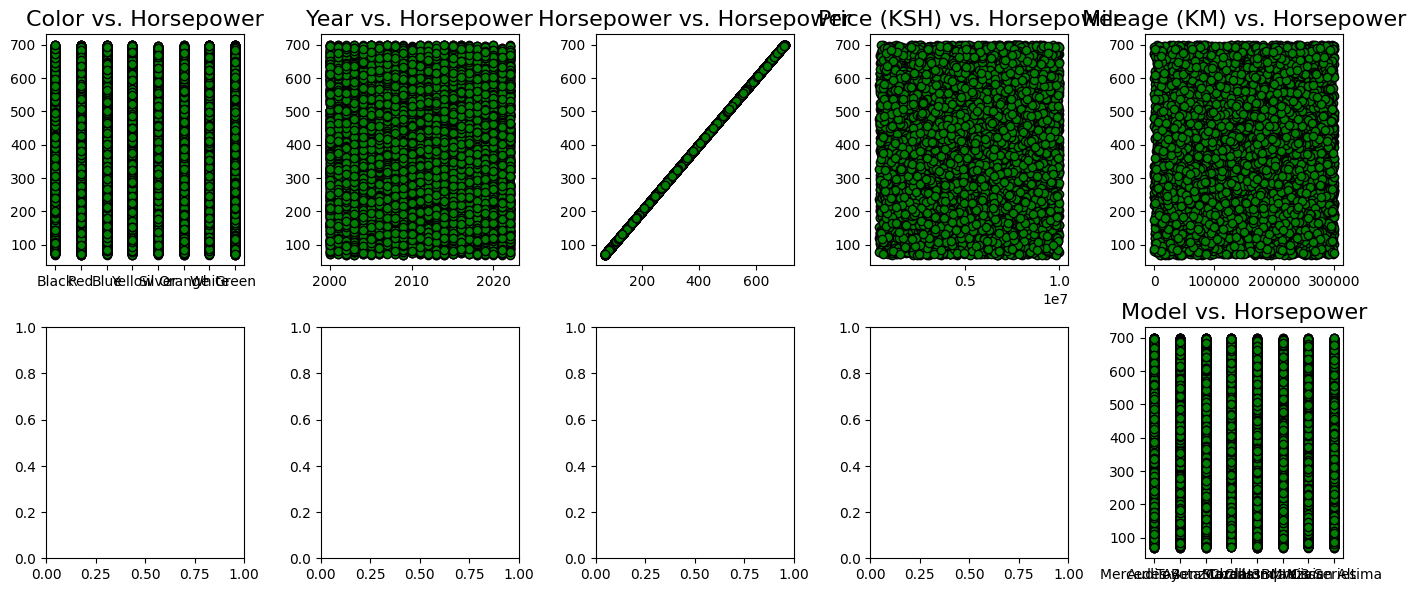

In [47]:
#Checking for linearity
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. Horsepower".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['Horsepower'],color='green',edgecolor='k')

fig.tight_layout(pad=1)

In [48]:
df1 = df.copy()

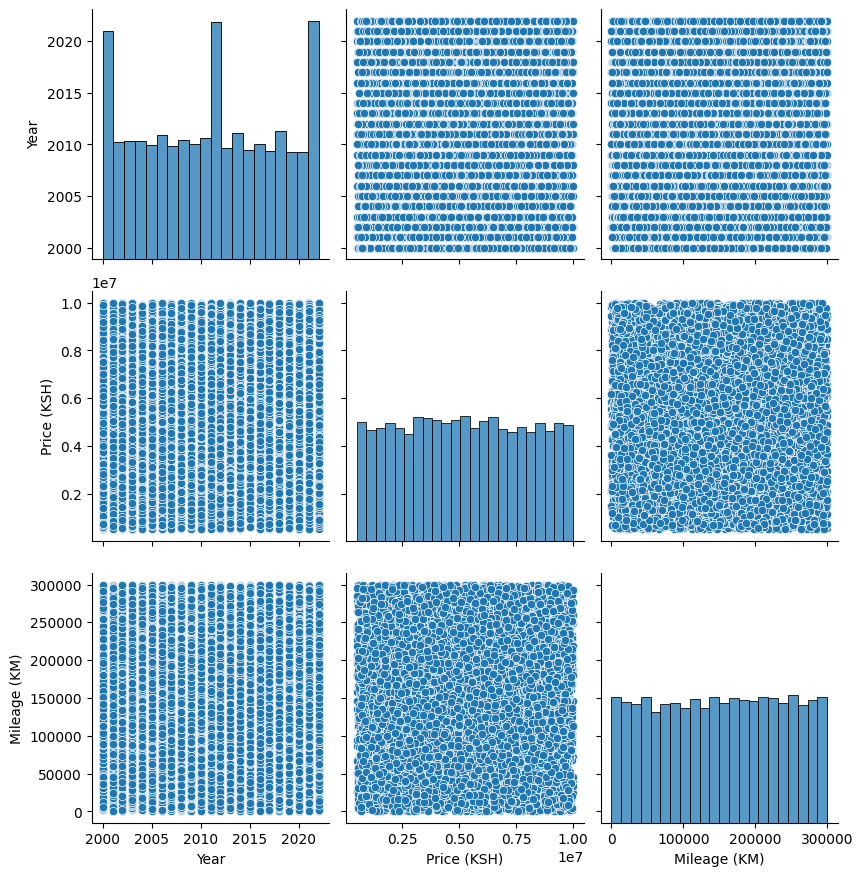

In [49]:
#Checking for multicollinearity
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('Horsepower', axis='columns'))
g.fig.set_size_inches(9,9)

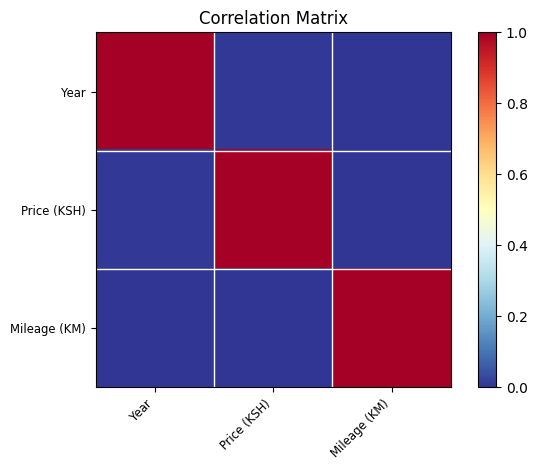

In [52]:
# We only compare the predictor variables, and thus drop the target `Horsepower` column.
# Select only numeric columns for correlation calculation
numeric_df = df1.drop('Horsepower', axis='columns').select_dtypes(include=['number'])
corr = numeric_df.corr()
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(corr,xnames=corr.columns)

In [58]:
import statsmodels.formula.api as sm

# Wrap column names with spaces in backticks using patsy's Q function
formula_str = 'Horsepower ~ Model + Color + Year + Q("Price (KSH)") + Q("Mileage (KM)")'

# Construct and fit the model
model = sm.ols(formula=formula_str, data=df1)
fitted = model.fit()

In [59]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Horsepower   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.040
Date:                Fri, 21 Feb 2025   Prob (F-statistic):              0.410
Time:                        08:11:12   Log-Likelihood:                -66194.
No. Observations:               10000   AIC:                         1.324e+05
Df Residuals:                    9982   BIC:                         1.326e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

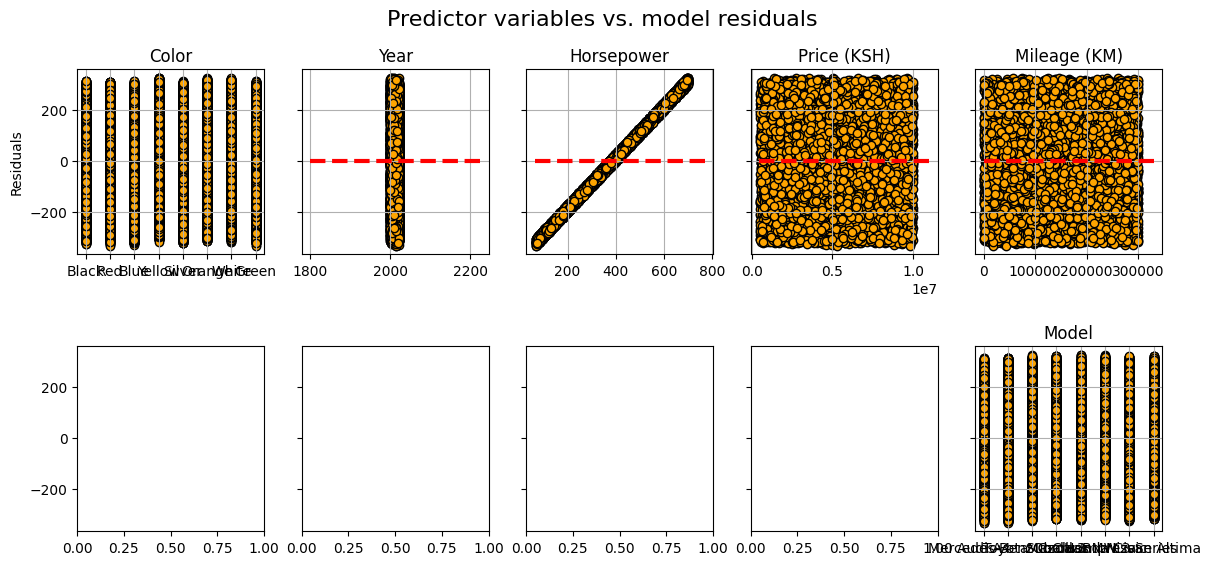

In [62]:
#Checking for independence
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df[column],y=fitted.resid,color='orange',edgecolor='k')
    axs[index-1].grid(True)

    # Check if the column contains numeric data before calculating min/max
    if pd.api.types.is_numeric_dtype(df[column]):
        xmin = min(df[column])
        xmax = max(df[column])
        axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    else:
        # Handle non-numeric columns (e.g., skip hlines or use different visualization)
        pass

    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

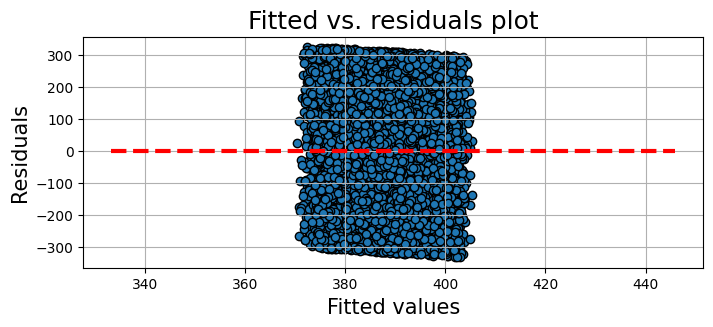

In [63]:
#Checking for homoscedasticity
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [64]:
import statsmodels.stats.api as sms

# 1. Calculate residuals
residuals = fitted.resid

# 2. Perform Breusch-Pagan test
bp_test_result = sms.het_breuschpagan(residuals, fitted.model.exog)
print("Breusch-Pagan Test Results:")
print("LM Statistic:", bp_test_result[0])
print("LM-Test p-value:", bp_test_result[1])
print("F-Statistic:", bp_test_result[2])
print("F-Test p-value:", bp_test_result[3])

Breusch-Pagan Test Results:
LM Statistic: 16.725375916598615
LM-Test p-value: 0.4731170349848065
F-Statistic: 0.9837200287247008
F-Test p-value: 0.47336314441029026


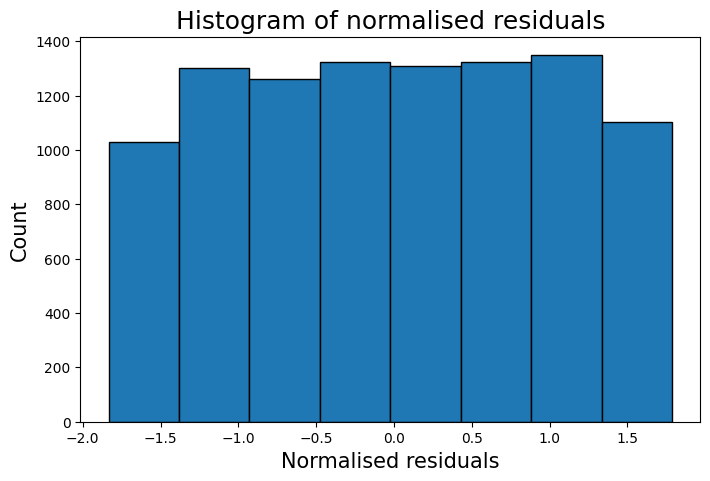

In [65]:
#Checking for normality
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalised residuals',fontsize=15)
plt.title("Histogram of normalised residuals",fontsize=18)
plt.show()

<Figure size 800x500 with 0 Axes>

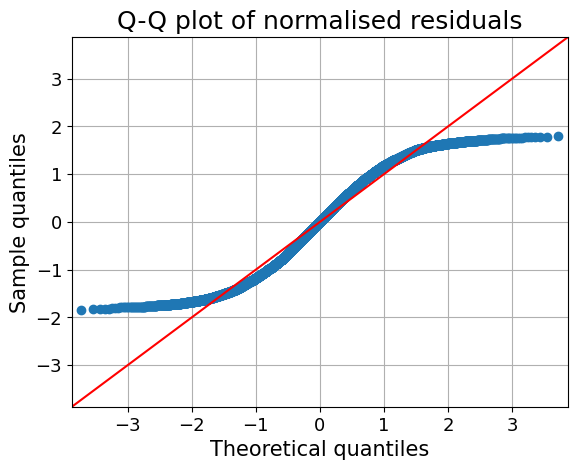

In [66]:
#Q-Q plot of the residuals
# We once again use the statsmodel library to assist us in producing our qqplot visualisation.
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalised residuals",fontsize=18)
plt.grid(True)
plt.show()

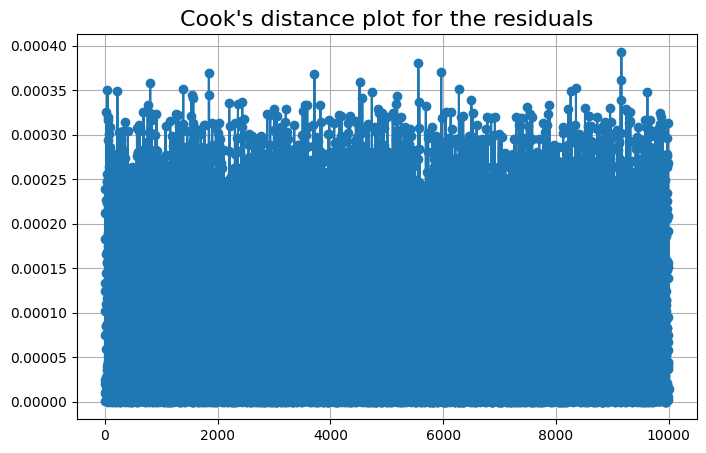

In [67]:
#Checking for outliers in residuals
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf=influence(fitted)
(c, p) = inf.cooks_distance
plt.figure(figsize=(8, 5))
plt.title("Cook's distance plot for the residuals", fontsize=16)
plt.plot(np.arange(len(c)), c, marker='o', linestyle='-')
plt.grid(True)
plt.show()